In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.linalg import hankel
from utils import params
import pandas as pd

In [2]:
with open('Results/final_output.pkl', 'rb') as f:
    results = pickle.load(f)
X_ori = results['x'].cpu().detach().numpy()
dx_ori = results['dx'].cpu().detach().numpy()
z = results['z'].cpu().detach().numpy()
sindy_coeff = results['sindy_coefficients'].cpu().detach().numpy()
Theta = results['Theta'].cpu().detach().numpy()

measured_index = [i*params['embedding_dimension'] for i in range(params['partial_measurement'])]
X_ori = X_ori[:, measured_index]
dx_ori = dx_ori[:, measured_index]

In [3]:
z

array([[ 6.0562167 ,  5.3704615 ,  5.6768656 , ...,  0.6765468 ,
        -1.174519  ,  2.1464992 ],
       [ 6.223338  ,  5.1365256 ,  5.746091  , ...,  0.7952248 ,
        -0.9349187 ,  1.7621527 ],
       [ 6.202671  ,  5.374364  ,  5.8555174 , ...,  0.6386624 ,
        -0.8099283 ,  1.5057684 ],
       ...,
       [ 3.5233243 ,  2.499552  ,  2.696398  , ...,  0.48994553,
         1.139191  ,  1.0530721 ],
       [ 3.3688204 ,  2.6958888 ,  2.8069577 , ...,  0.29037207,
         0.86954427,  0.92164856],
       [ 3.5880928 ,  2.8177538 ,  2.8980503 , ...,  0.4330864 ,
         1.0737584 ,  1.1464323 ]], dtype=float32)

In [4]:
z.shape

(399, 16)

In [5]:
from sindy_utils import sindy_library
from scipy.optimize import approx_fprime
def f(x):
    x = x.reshape(1,-1)
    Theta_curr = sindy_library(x,2,False)
    dz = np.matmul(Theta_curr, sindy_coeff)
    return dz.T.reshape(-1)

In [6]:
eig_all = np.zeros([z.shape[1], z.shape[0]])
for i in range(z.shape[0]):
    z_curr = z[i,:]
    J = approx_fprime(z_curr, f, epsilon=1e-6)
    eig, _ = np.linalg.eig(J)
    eig = np.real(eig)
    eig_all[:,i] = eig

In [7]:
eig_all

array([[-0.01537642, -0.01013953, -0.00438195, ...,  0.02031826,
         0.00943001,  0.01382995],
       [-0.01537642, -0.01013953, -0.00438195, ...,  0.02031826,
         0.00943001,  0.01382995],
       [ 0.01332288,  0.00718519,  0.03341339, ..., -0.03009247,
        -0.02047011, -0.00042683],
       ...,
       [-0.01021566, -0.01817059, -0.0584626 , ..., -0.01518889,
         0.00862526,  0.0068049 ],
       [-0.01021566, -0.01817059, -0.00067292, ..., -0.01518889,
         0.00862526, -0.03270372],
       [-0.05967174, -0.05434425, -0.00067292, ...,  0.0033448 ,
        -0.00897372, -0.02572804]])

In [8]:
negative_columns = np.where(np.all(eig_all < 0, axis=0))[0]

In [9]:
max_values = np.max(eig_all, axis=0)
min_values = np.min(eig_all, axis=0)

# Create a new NumPy array with max and min values
eig_all_bound = np.vstack((max_values, min_values))

In [10]:
eig_all_bound

array([[ 0.01417723,  0.01553899,  0.03341339,  0.02202132,  0.03055595,
         0.03214081,  0.02772659,  0.02014825,  0.02916675,  0.02077375,
         0.02953862,  0.03626241,  0.04287944,  0.0421982 ,  0.03111433,
         0.03789012,  0.04343989,  0.03471312,  0.03533538,  0.02474745,
         0.02466279,  0.02919247,  0.02723679,  0.03571737,  0.00881321,
         0.0105496 ,  0.01792504,  0.02399647,  0.04605153,  0.05043168,
         0.05950358,  0.05207352,  0.05223952,  0.0515547 ,  0.05337948,
         0.05030035,  0.03085413,  0.04325138,  0.02706623,  0.02338217,
         0.02026346,  0.01028382,  0.02377827,  0.02087373,  0.0282505 ,
         0.03436944,  0.01547853,  0.02751416,  0.0359592 ,  0.03575563,
         0.02457567,  0.02642458,  0.02289343,  0.02464631,  0.01015164,
         0.01707052,  0.02176177,  0.024889  ,  0.03025292,  0.01194586,
         0.01260683,  0.01610249,  0.02608381,  0.02445949,  0.02017175,
         0.03049041,  0.03236714,  0.02865823,  0.0

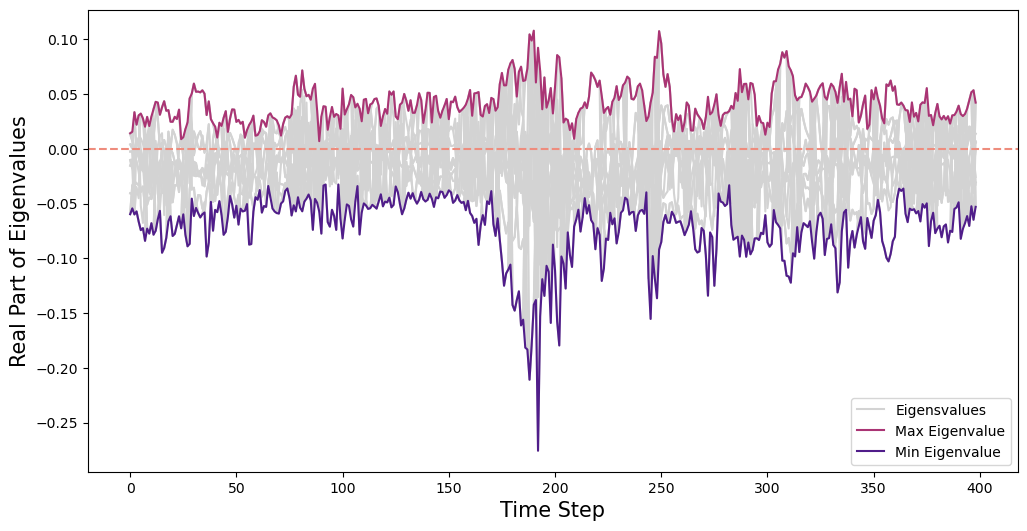

In [11]:
fig = plt.figure(figsize=(12, 6))

for i, row in enumerate(eig_all):
    if i == 0:
        plt.plot(row, "-", color='lightgrey', label= "Eigensvalues")
    else:
        plt.plot(row, "-", color='lightgrey')


plt.plot(eig_all_bound[0,:], "-", color='#aa3474', label= "Max Eigenvalue")
plt.plot(eig_all_bound[1,:], "-", color='#501d8a', label= "Min Eigenvalue")

plt.axhline(0, color='#ee8c7d', linestyle='--')
plt.xlabel('Time Step', fontsize=15)
plt.ylabel('Real Part of Eigenvalues', fontsize=15)
plt.legend(fontsize=10, loc="lower right")
plt.rcParams['font.family'] = 'Times New Roman'
#plt.savefig("Figures/EigenValues.png",dpi=300)

In [12]:
z_re = z*100

In [13]:
z_re = z_re.T[0:10,:]

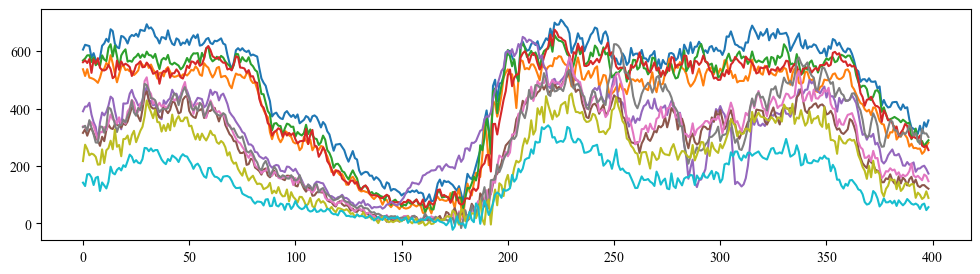

In [14]:
fig = plt.figure(figsize=(12, 3))
for i, row in enumerate(z_re):
    plt.plot(row, "-", label=f"Eigenvalue # {i+1}")

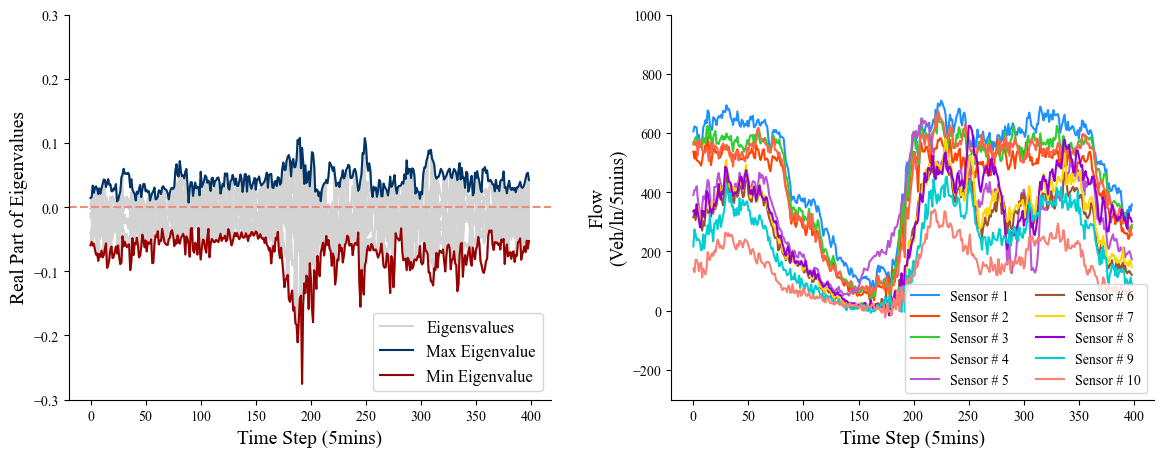

In [25]:
import matplotlib.colors as mcolors
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.exp(x)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the first subplot

for i, row in enumerate(eig_all):
    if i == 0:
        ax1.plot(row, "-", color='lightgrey', label= "Eigensvalues")
    else:
        ax1.plot(row, "-", color='lightgrey')
ax1.plot(eig_all_bound[0,:], "-", color='#003366', label= "Max Eigenvalue")
ax1.plot(eig_all_bound[1,:], "-", color='#990000', label= "Min Eigenvalue")

ax1.axhline(0, color='#ee8c7d', linestyle='--')
#ax1.xlabel('Time Step', fontsize=15)
ax1.set_ylabel('Real Part of Eigenvalues', fontsize=14)
ax1.set_xlabel('Time Step (5mins)', fontsize=14)
ax1.set_ylim([-0.3, 0.3])
ax1.legend(fontsize=12, loc="lower right")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# start_color = '#8E44AD'
# end_color = '#F39C12'
#
# cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [start_color, end_color], N=z_re.shape[0])

cmap = [
    mcolors.CSS4_COLORS['dodgerblue'],
    mcolors.CSS4_COLORS['orangered'],
    mcolors.CSS4_COLORS['limegreen'],
    mcolors.CSS4_COLORS['tomato'],
    mcolors.CSS4_COLORS['mediumorchid'],
    mcolors.CSS4_COLORS['sienna'],
    mcolors.CSS4_COLORS['gold'],
    mcolors.CSS4_COLORS['darkviolet'],
    mcolors.CSS4_COLORS['darkturquoise'],
    mcolors.CSS4_COLORS['salmon']
]


# Plot the second subplot
for i, row in enumerate(z_re):
    ax2.plot(row, "-", color = cmap[i], label=f"Sensor # {i+1}")
ax2.legend(fontsize=10, loc="lower right", ncol=2)
ax2.set_ylim([-300, 1000])
ax2.set_ylabel('Flow\n(Veh/ln/5mins)', fontsize=14)
ax2.set_xlabel('Time Step (5mins)', fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Set a shared x-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.25)
# Show the plot
plt.show()
fig.savefig("Figures/EigenValues_alt.png",dpi=300)